# CMSE 202 Final S23 (Sect. 002)


### <p style="text-align: right;"> &#9989; Anthony McCollom</p>
### <p style="text-align: right;"> &#9989; mccoll58</p>

The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.

### INSTRUCTORS MAY WANT TO CHANGE THIS PART
While the exam will be *open* for 12 hours, **you should only take two hours on the exam.** The exam was written to take two hours. We'll be going on the honor system for this. There are times when instructors will be available to answer questions. 


### Content Knowledge Tested
- Using Github to save and track progress on your work
- Effectively visualizing data
- Using ML tools to create a classification model
- Quantitatively evaluating classification models

## Part 0: Add to your Git repository to track your progress on your exam (10 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### Part 0.1 (4 Points)

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `final` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

## Part 1 (5 Points)

For this exam, you’ll be working with a data set that contains measurements of the physical characteristics of dry seeds (e.g., shape, size, etc.). This is a subset of the larger dataset that can be [found here](http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset). We’ll ask you a set of questions that center the classification of these seeds using techniques you’ve worked with in class and on the homework. 

To get started, let’s grab the dataset we’ll be working with.

**Use the following URL to download the dataset. Import the dataset in the cell below.**

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/Seed_data.csv`

In [1]:
#Write your code for downloading the data here
!curl -o Seed_data.csv https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/Seed_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  589k  100  589k    0     0   113k      0  0:00:05  0:00:05 --:--:--  123k


In [2]:
#Write your code for importing the data here
import pandas as pd
seed = pd.read_csv("Seed_data.csv")
seed

,roundness,ShapeFactor2,Compactness,Class
0,0.958027,0.003147,0.913358,SEKER
1,0.887034,0.003564,0.953861,SEKER
2,0.947849,0.003048,0.908774,SEKER
3,0.903936,0.003215,0.928329,SEKER
4,0.984877,0.003665,0.970516,SEKER
...,...,...,...,...
9090,0.916603,0.001749,0.801865,DERMASON
9091,0.922015,0.001886,0.822252,DERMASON
9092,0.918424,0.001888,0.822730,DERMASON
9093,0.907906,0.001852,0.817457,DERMASON


In [4]:
# !git clone https://github.com/mccoll58/CMSE202-s23-turnin.git

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Part 2 (15 Points)

Use Seaborn to make a visualization showing the distributions (I.e., histograms and/or scatterplots) of each of the different seed characteristics. Your visualization should represent each of the different seed type/classes as a different color. This should all be a single figure. Use the [**examples in the seaborn gallery**](https://seaborn.pydata.org/examples/index.html) to help you find the right type of figure. (Note: There are several types of figures that will work for this.)

<AxesSubplot:xlabel='roundness', ylabel='Count'>

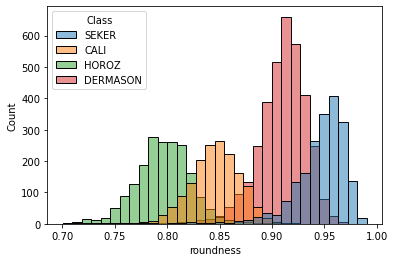

In [9]:
#Write your plotting code here
import seaborn as sea
sea.histplot(x = seed['roundness'],hue = seed['Class'])

<AxesSubplot:xlabel='ShapeFactor2', ylabel='Count'>

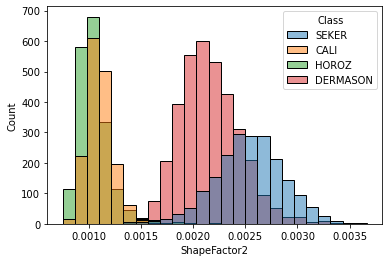

In [7]:
sea.histplot(x = seed['ShapeFactor2'],hue = seed['Class'])

<AxesSubplot:xlabel='Compactness', ylabel='Count'>

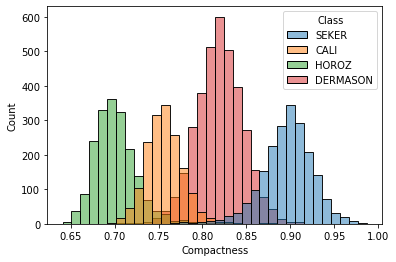

In [8]:
sea.histplot(x = seed['Compactness'],hue = seed['Class'])

#### Part 3 (15 Points)

Look at the distributions of the data. Without doing any model fitting (I.e., just by eye), which pair of seeds do you think would be **easiest** for an ML technique to differentiate between? Which pair of seeds do you believe would be **hardest** to separate? **Why?** Justify your answers using your visualization.

- I think the easiest seeds to differentiate would be Seker and Horoz because they are so different in their distributions. Horoz seems to be at the bottom of every characterisitc meaning it would usually have low numbers while Seker is always at the top of every characteristic meaning it would usually have higher numbers. As seen in the compactness graph, Seker is at the front with a range from about .8 to .97 while Horoz is in a range from .65 to .77. There is little to no overlapping in the graph. I think this would make an impact to make it easier to differentiate because the technique would see a higher number and think, must be seker, or sees a lower number and must mean Horoz.

- I think Cali and Horoz would be the hardest to differentiate between in a ML technique because they have very similar numbers which could make it difficult to seperate between. For example, in ShapeFactor2, they almost completley overlap in the lower range of .005 to .0015. Looking at the other graphs too, they over lap also meaning they are very similar in characteristics. This would be difficult to differentiate because they are so similar rather than being differnet like Seker and Horoz.

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 4 (15 Points)

Create a new dataframe that only contains data for the seeds that you believe will be easiest to separate. (You may need to use Google to figure out how to do this.)

In [10]:
#Write your code for selecting your data here
mask = (seed["Class"] == "HOROZ") | (seed["Class"] == "SEKER")
new = seed[mask]
new
# from https://stackoverflow.com/questions/34278235/how-to-create-mask-with-multiple-alternative-values-pandas-dataframe

,roundness,ShapeFactor2,Compactness,Class
0,0.958027,0.003147,0.913358,SEKER
1,0.887034,0.003564,0.953861,SEKER
2,0.947849,0.003048,0.908774,SEKER
3,0.903936,0.003215,0.928329,SEKER
4,0.984877,0.003665,0.970516,SEKER
...,...,...,...,...
5554,0.794104,0.000830,0.687782,HOROZ
5555,0.785117,0.000782,0.674331,HOROZ
5556,0.802588,0.000837,0.691181,HOROZ
5557,0.777191,0.000816,0.685733,HOROZ


## Part 5 (5 Points)

Split the data into a training and testing set. (Make sure to change the class values so that they're 0 and 1, instead of the actual seed names.) Also, for stupid reasons, set the `random_state` to be 35.

In [15]:
#Write your code for splitting your data here
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
new = new.replace("SEKER",0)
new = new.replace("HOROZ",1)
new1 = new['Class']
new_drop = new.drop(columns = ['Class'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(new_drop, new1, test_size = .25, random_state=35)
X_train

,roundness,ShapeFactor2,Compactness
1112,0.957661,0.002462,0.890216
4398,0.834447,0.001274,0.747175
390,0.969774,0.002948,0.928393
506,0.942213,0.002729,0.907836
5047,0.818175,0.001078,0.720201
...,...,...,...
4682,0.802791,0.000994,0.693187
4735,0.829598,0.001085,0.714822
951,0.921688,0.002463,0.886896
1295,0.966444,0.002678,0.920075


## Part 6 (20 Points)

Create and train a model (either regression or SVM) for classifying the data. You can choose which type of model you want to use. **Note:** You may get multiple warnings when creating your model (warnings are *pink*). You may also get a warning about a failure to converge. It is fine to ignore these warnings. 

In [16]:
#Write your code for training your model here
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
print(result.summary())

         Current function value: 0.033543
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 2946
Model:                          Logit   Df Residuals:                     2942
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.9516
Time:                        14:59:56   Log-Likelihood:                -98.819
converged:                      False   LL-Null:                       -2041.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1080.0154    522.146      2.068      0.039      56.628    2103.403
roundness     -183.9904     91.489     -2.011      0.044   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 7 (5 Points)

Evaluate your model by finding the accuracy, recall, and precision using the training data.

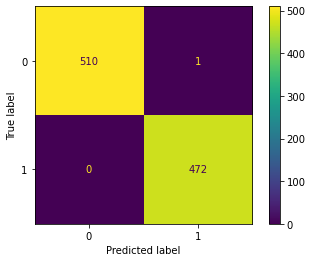

In [17]:
#Write your code for determining the accuracy, recall, and precision of your model
# USED A CONFUSION MATRIX TO GET TRUE VALUES
prediction = result.predict(sm.add_constant(X_test))
prediction = prediction > 0.5

cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [18]:
# Precision = true positive/(true positive+false positive)
Precision = 510/(510+0)
# Recall = true positive/(true positive+false negative)
Recall = 510/(510+1)
print(Precision,Recall)
# Accuracy
Accuracy = (510+472)/(510+0+1+472)
Accuracy

1.0 0.9980430528375733


0.9989827060020345

My model was very good at predicting and had almost 100% accuracy, Recall and Precision

## Part 8 (10 Points)

Do you think that this model does a good job of classifying the data? How does it compare to previous classification models you’ve created, both in class and on the homework?

It does a good job classifying the data because the Accuracy, Recall and Precision were all almost 100% but I'm not sure how accurate my prediction model is. I'm not so sure because I have almost 100% of everything which is very very rare but, this could be because the data is so different for the two seeds making it very very easy to decide which is which. I think it compares pretty well to the model we made in homework 4 with, will it rain, because the model I created also had a very high Accuracy, Recall and Precision from a range of 89% to 94% for each meaning it was pretty accurate. My model in the final however might just be a little bit better than the homework 4 model because it would be much easier to classify seeds based on very differenet statistical characteristics (Seker being higher numbers, Horoz being lower numbers) rather than trying to predict will it rain using about 10 variables.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!** (2 points)

Take a moment to save your notebook, commit the changes to your Git repository.

---

## You're done! Congrats on finishing CMSE 202!

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University